## Keras Tutorial

http://keras.io

Esse tutorial é uma versão simplificada do tutorial disponível em: https://github.com/MLIME/Frameworks/tree/master/Keras

#### O que é Keras?

> Keras is a high-level neural networks API, written in Python and capable of running on top of either TensorFlow or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Esse tutorial é dividido em três partes

1. Funcionamento Básico do Keras
2. Exemplo de Deep Feedforward Network
3. Exemplo de Convolutional Neural Network


### 1. Funcionamento básico do Keras

#### Backends
- Theano ou TensorFlow (CPU ou GPU)

#### Tipos de Layers
- Core layers: Dense, Activation, Dropout, Flatten
- Convolutional layers: ConvXD, CroppingXD, UpSamplingXD
- Pooling Layers: MaxPoolingXD, AveragePoolingXD
- Custom layers can be created

#### Funções de perda
- categorical_crossentropy
- sparse_categorical_crossentropy
- binary_crossentropy
- mean_squared_error
- mean_absolute_error

#### Otimizadores
- SGD
- RMSprop
- Adagrad
- Adadelta
- Adam
- Adamax


#### Ativações
- softmax
- elu
- relu
- tanh
- sigmoid
- hard_sigmoid
- linear

#### Inicializadores
- Zeros
- RandomNormal
- RandomUniform
- TruncatedNormal
- VarianceScaling
- Orthogonal
- Identity
- lecun_uniform
- glorot_normal
- glorot_uniform
- he_normal
- he_uniform


## Inicialização
Importamos bibliotecas e carregamos os dados

Using TensorFlow backend.


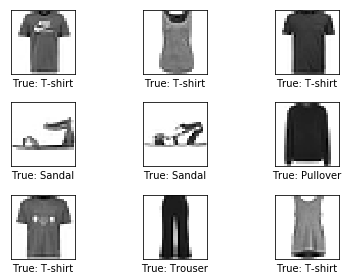

In [1]:
import util
import numpy as np
import keras
from keras.utils import np_utils

X_train, y_train, X_test, y_test = util.load_mnist_dataset()
y_train_labels = np.array(util.get_label_names(y_train))

# Converte em one-hot para treino
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

#Mostra algumas imagens
examples = np.random.randint(0, X_train.shape[0] - 9, 9)
image_shape = (X_train.shape[2], X_train.shape[3])
util.plot9images(X_train[examples], y_train_labels[examples], image_shape)

### 2. Construindo DFNs com Keras

#### Reshaping MNIST data

In [2]:
#Achatamos imagem em um vetor
X_train = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
X_test = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))

In [3]:
#Sequential é a API que permite construirmos um modelo ao adicionar incrementalmente layers
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

DFN = Sequential()
DFN.add(Dense(128, input_shape=(28*28,), activation='relu'))
DFN.add(Dense(128, activation='relu'))
DFN.add(Dense(128, activation='relu'))
DFN.add(Dense(10, activation='softmax'))

#optim = SGD(lr=0.01 ) - pode construir o otimizador por fora para definir parametros

DFN.compile(loss='categorical_crossentropy', 
              optimizer='sgd', #ou usar os parâmetros padrão
              metrics=['accuracy'])

DFN.fit(X_train, y_train, batch_size=32, epochs=2,
          validation_split=0.2, 
          verbose=1)

print('\nAccuracy: %.2f' % DFN.evaluate(X_test, y_test, verbose=1)[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 6s - loss: 0.7877 - acc: 0.7339 - val_loss: 0.5434 - val_acc: 0.8123
Epoch 2/2
 9728/10000 [============================>.] - ETA: 0s
Accuracy: 0.82


### 3. Construindo CNNs com Keras

#### Reshaping MNIST data

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#### Compilando e ajustando CNN

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import MaxPooling2D
from keras.layers.convolutional import Conv2D

CNN = Sequential()
CNN.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 input_shape=(28, 28, 1),))
CNN.add(MaxPooling2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))
CNN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))
CNN.add(Flatten())
CNN.add(Dense(256, activation='relu'))
CNN.add(Dropout(0.5))
CNN.add(Dense(10, activation='softmax'))

CNN.compile(loss='categorical_crossentropy',
              optimizer='sgd', 
              metrics=['accuracy'])

CNN.fit(X_train, y_train, batch_size=32, epochs=2,
          validation_split=0.2, 
          verbose=1)

print('\nAccuracy: %.2f' % CNN.evaluate(X_test, y_test, verbose=1)[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 109s - loss: 1.0743 - acc: 0.5955 - val_loss: 0.6570 - val_acc: 0.7459
Epoch 2/2
 9952/10000 [============================>.] - ETA: 0s
Accuracy: 0.77


#### Comparamos resultados:

In [11]:
cnn_pred = CNN.predict(X_test, verbose=1)
dfn_pred = DFN.predict(X_test.reshape((X_test.shape[0], np.prod(X_test.shape[1:]))), verbose=1)

cnn_pred = np.array(list(map(np.argmax, cnn_pred)))
dfn_pred = np.array(list(map(np.argmax, dfn_pred)))
y_pred   = np.array(list(map(np.argmax, y_test)))


 9600/10000 [===========================>..] - ETA: 0s

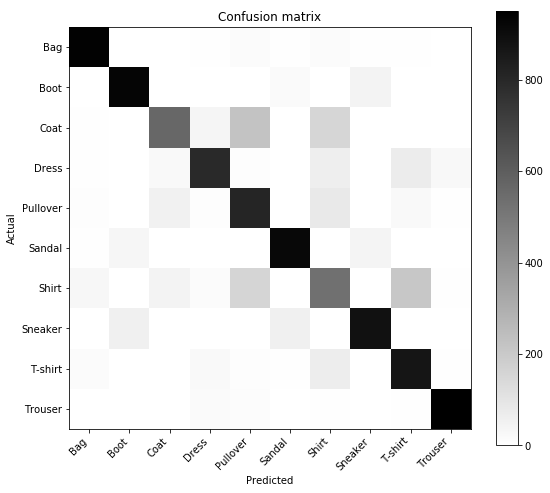

In [12]:
util.plotconfusion(util.get_label_names(y_pred), util.get_label_names(dfn_pred))

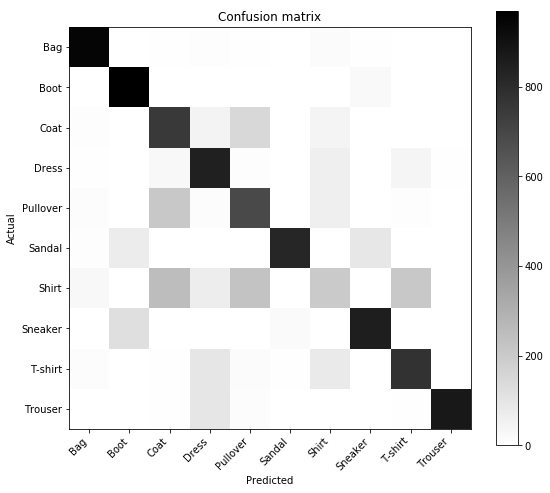

In [13]:
util.plotconfusion(util.get_label_names(y_pred), util.get_label_names(cnn_pred))

Vamos observar alguns exemplos mal classificados:

In [19]:
cnn_missed = cnn_pred != y_pred
dfn_missed = dfn_pred != y_pred
cnn_and_dfn_missed = np.logical_and(dfn_missed, cnn_missed)

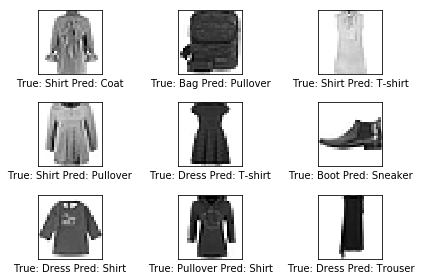

In [15]:
util.plot_missed_examples(X_test, y_pred, dfn_missed, dfn_pred)

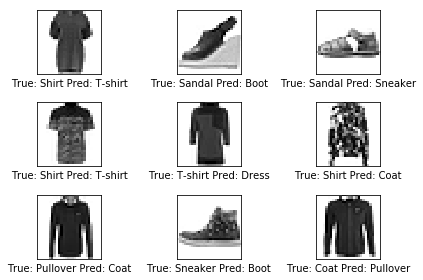

In [20]:
util.plot_missed_examples(X_test, y_pred, cnn_missed, cnn_pred)

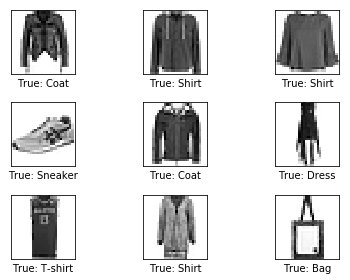

In [22]:
util.plot_missed_examples(X_test, y_pred, cnn_and_dfn_missed)